In [ ]:
#Link : https://www.kaggle.com/datasets/shayalvaghasiya/ddos-sdn?resource=download

# dt: Generalmente representa la marca de tiempo (datetime) en que ocurrió el evento o captura del dato.
# switch: Puede referirse al identificador del switch de red donde se capturó el paquete o flujo.
# src: Dirección IP de origen (source IP).
# dst: Dirección IP de destino (destination IP).
# pktcount: Número total de paquetes en un flujo o intervalo de tiempo.
# bytecount: Número total de bytes transferidos en ese flujo o intervalo.
# dur: Duración del flujo o sesión en segundos (o la unidad de tiempo que uses).
# dur_nsec: Duración con mayor precisión en nanosegundos (parte fraccionaria de dur).
# tot_dur: Duración total acumulada o alguna duración combinada de múltiples flujos o sesiones.
# flows: Cantidad de flujos en un intervalo o segmento de tiempo.
# packetins: Paquetes entrantes (inbound packets).
# pktperflow: Promedio de paquetes por flujo (packet count / number of flows).
# byteperflow: Promedio de bytes por flujo (byte count / number of flows).
# pktrate: Tasa de paquetes, puede ser paquetes por segundo u otra unidad de tiempo.
# Pairflow: Probablemente representa un identificador de flujo par (bidireccional), por ejemplo combinación src-dst y dst-src.
# Protocol: Protocolo de transporte o red usado (TCP, UDP, ICMP, etc.).
# port_no: Número de puerto asociado (generalmente el puerto de destino o fuente).
# tx_bytes: Bytes transmitidos (transmitted bytes).
# rx_bytes: Bytes recibidos (received bytes).
# tx_kbps: Kilobits por segundo transmitidos (tasa de transmisión).
# rx_kbps: Kilobits por segundo recibidos (tasa de recepción).
# A1 y A2: Podrían ser atributos adicionales específicos de tu dataset, como indicadores de tipo de flujo, estado, o categorías asignadas (pueden ser etiquetas o métricas personalizadas).
# tot_kbps: Total de kilobits por segundo (tx_kbps + rx_kbps).
# label: Etiqueta o clase para clasificación, por ejemplo si el flujo es benigno o malicioso (útil en aprendizaje automático).


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('dataset_sdn_normal.csv')


dataset

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,A1,A2,tot_kbps,label
0,11425,1,167772161,167772168,45304,48294064,100,716000000,1.010000e+11,3,...,1,3,143928631,3917,0,0.0,0,0,0.0,0
1,11605,1,167772161,167772168,126395,134737070,280,734000000,2.810000e+11,2,...,1,4,3842,3520,0,0.0,0,0,0.0,0
2,11425,1,167772162,167772168,90333,96294978,200,744000000,2.010000e+11,3,...,1,1,3795,1242,0,0.0,0,0,0.0,0
3,11425,1,167772162,167772168,90333,96294978,200,744000000,2.010000e+11,3,...,1,2,3688,1492,0,0.0,0,0,0.0,0
4,11425,1,167772162,167772168,90333,96294978,200,744000000,2.010000e+11,3,...,1,3,3413,3665,0,0.0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63556,5262,3,167772165,167772167,79,7742,81,842000000,8.184200e+10,5,...,64,1,15209,12720,1,1.0,0,0,2.0,0
63557,5262,3,167772165,167772167,79,7742,81,842000000,8.184200e+10,5,...,64,3,15099,14693,1,1.0,0,0,2.0,0
63558,5262,3,167772171,167772165,31,3038,31,805000000,3.180500e+10,5,...,64,2,3409,3731,0,0.0,0,0,0.0,0
63559,5262,3,167772171,167772165,31,3038,31,805000000,3.180500e+10,5,...,64,1,15209,12720,1,1.0,0,0,2.0,0


In [ ]:
rx_bytes = dataset['rx_bytes'].to_numpy()
tx_bytes = dataset['tx_bytes'].to_numpy()
protocol = dataset['Protocol'].to_numpy()
flows = dataset['flows'].to_numpy()

In [ ]:
tx_bytes = dataset['tx_bytes'].to_numpy()
tx_bytes_sum = tx_bytes.sum()
tx_bytes_mean = tx_bytes.mean()
tx_bytes_max = tx_bytes.max()
tx_bytes_min= tx_bytes.min()
print('Total de tx_bytes enviados:', tx_bytes_sum)
print('Media de tx_bytes:', tx_bytes_mean)
print('Maximo de tx_bytes', tx_bytes_max)
print('Minimo de tx_bytes', tx_bytes_min)

rx_bytes = dataset['rx_bytes'].to_numpy()
rx_bytes_sum = rx_bytes.sum()
rx_bytes_mean = rx_bytes.mean()
rx_bytes_max = rx_bytes.max()
rx_bytes_min= rx_bytes.min()
print('Total de rx_bytes enviados:', rx_bytes_sum)
print('Media de rx_bytes:', rx_bytes_mean)
print('Maximo de rx_bytes', rx_bytes_max)
print('Minimo de rx_bytes', rx_bytes_min)

Total de tx_bytes enviados: 6314911846967
Media de tx_bytes: 99351990.16640708
Maximo de tx_bytes 1265626297
Minimo de tx_bytes 2527
Total de rx_bytes enviados: 6318294895481
Media de rx_bytes: 99405215.39121474
Maximo de rx_bytes 987911011
Minimo de rx_bytes 856


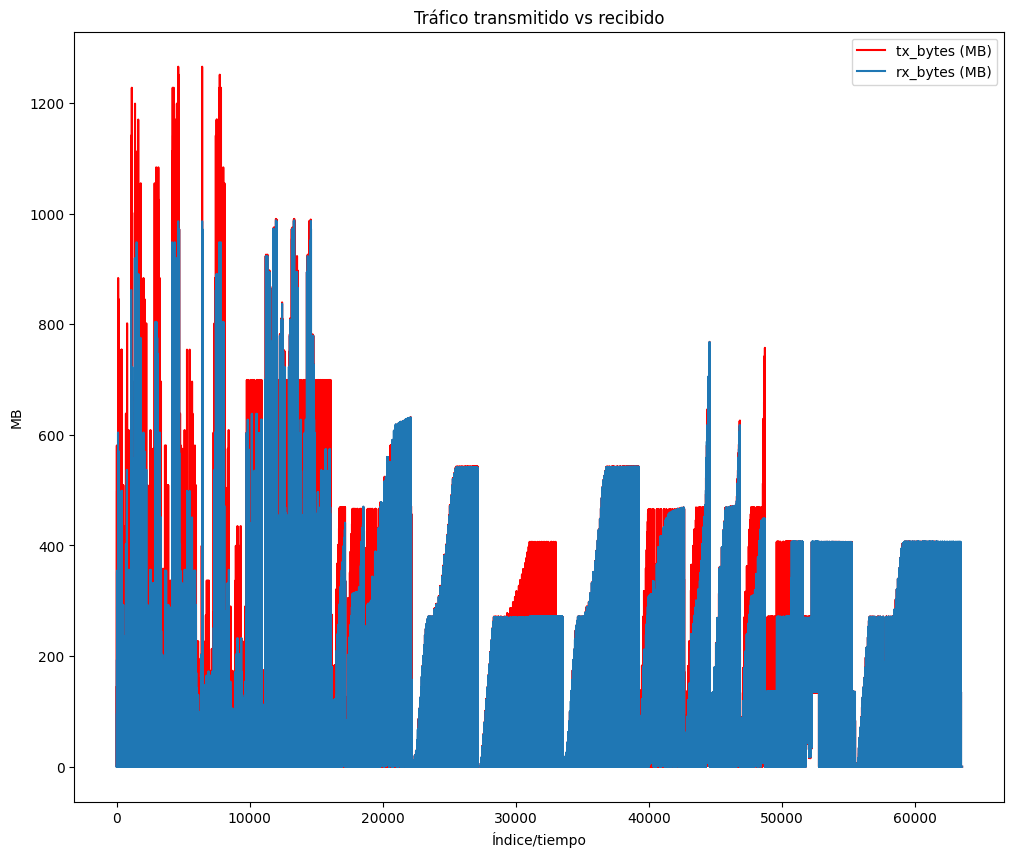

In [ ]:
tx_mbs = dataset['tx_bytes'] / 1e6
rx_mbs = dataset['rx_bytes'] / 1e6

plt.figure(figsize=(12,10))
plt.plot(tx_mbs, label='tx_bytes (MB)',color='red')
plt.plot(rx_mbs, label='rx_bytes (MB)')
plt.title('Tráfico transmitido vs recibido')
plt.xlabel('Índice/tiempo')
plt.ylabel('MB')
plt.legend()

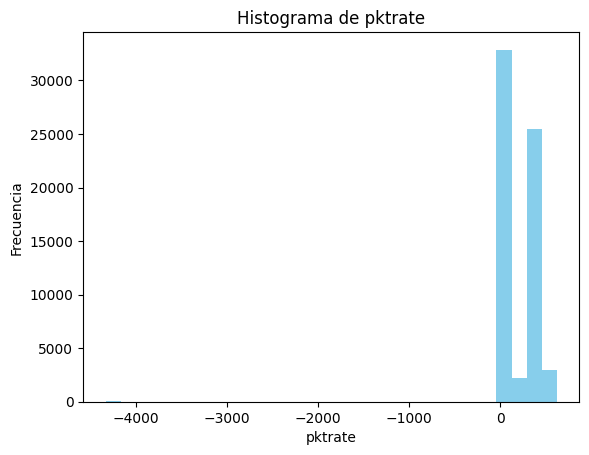

In [ ]:
plt.hist(dataset['pktrate'], bins=30, color='skyblue')
plt.title('Histograma de pktrate')
plt.xlabel('pktrate')
plt.ylabel('Frecuencia')
plt.show()

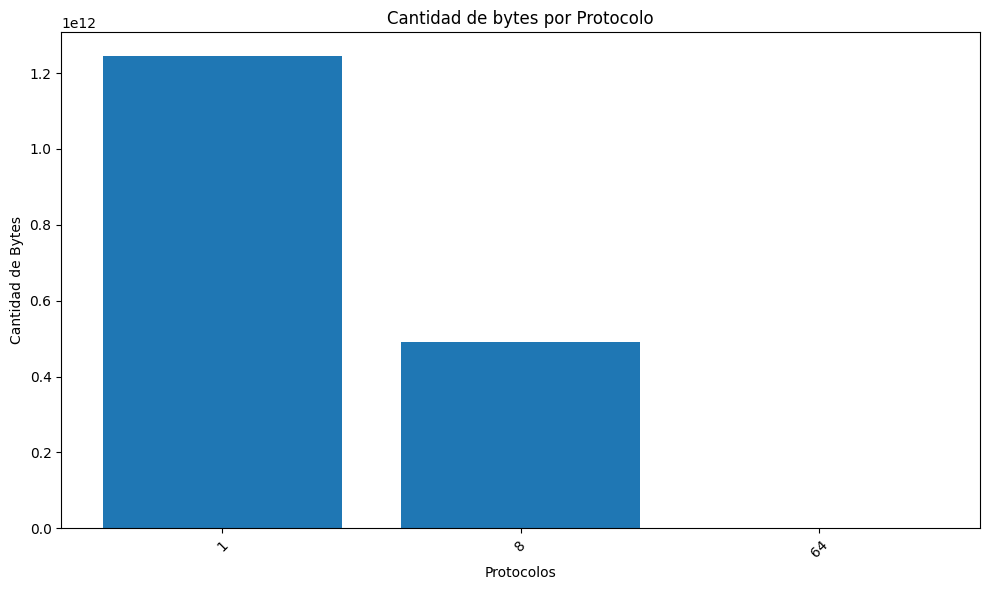

In [ ]:
grupo = dataset.groupby("Protocol")["bytecount"].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(grupo["Protocol"].astype(str), grupo["bytecount"])
plt.xlabel("Protocolos")
plt.ylabel("Cantidad de Bytes")
plt.title("Cantidad de bytes por Protocolo")
plt.xticks(rotation=45)
# Ajustar márgenes
plt.tight_layout()
plt.show()

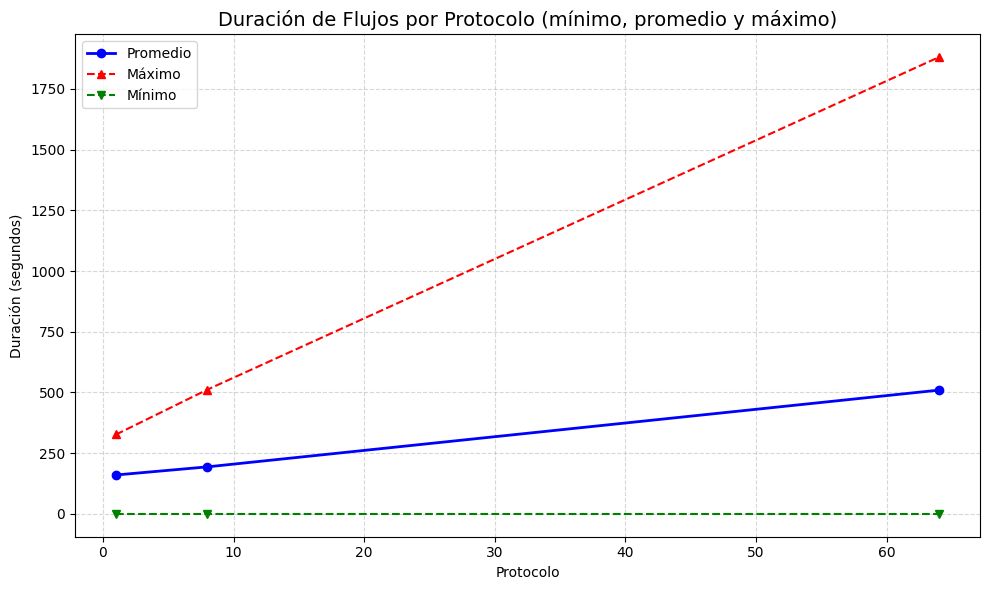

In [ ]:
# Calcular estadísticos por protocolo
duracion_stats = dataset.groupby('Protocol')['dur'].agg(['mean', 'max', 'min']).sort_index()

# Crear gráfico de líneas
plt.figure(figsize=(10,6))
plt.plot(duracion_stats.index, duracion_stats['mean'], marker='o', color='blue', linewidth=2, label='Promedio')
plt.plot(duracion_stats.index, duracion_stats['max'], marker='^', color='red', linestyle='--', label='Máximo')
plt.plot(duracion_stats.index, duracion_stats['min'], marker='v', color='green', linestyle='--', label='Mínimo')

# Etiquetas y estilo
plt.title('Duración de Flujos por Protocolo (mínimo, promedio y máximo)', fontsize=14)
plt.xlabel('Protocolo')
plt.ylabel('Duración (segundos)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

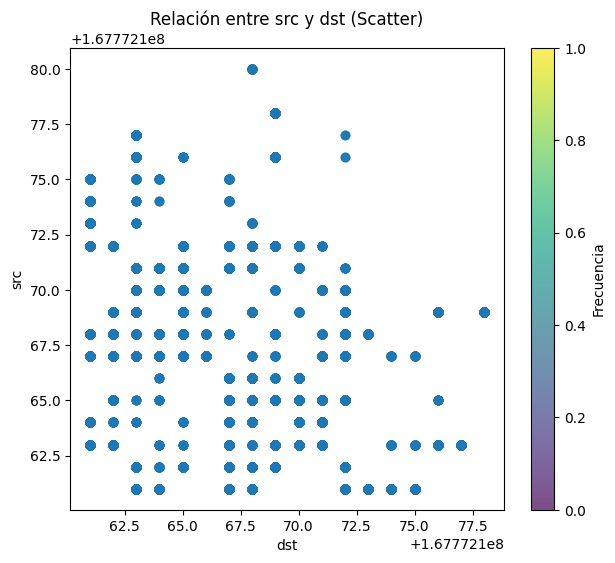

In [ ]:
# Crear gráfico scatter
plt.figure(figsize=(7, 6))
plt.scatter(dataset["dst"], dataset["src"], alpha=0.7)
# Etiquetas y título
plt.title("Relación entre src y dst (Scatter)")
plt.xlabel("dst")
plt.ylabel("src")
plt.colorbar(label="Frecuencia")
plt.show()

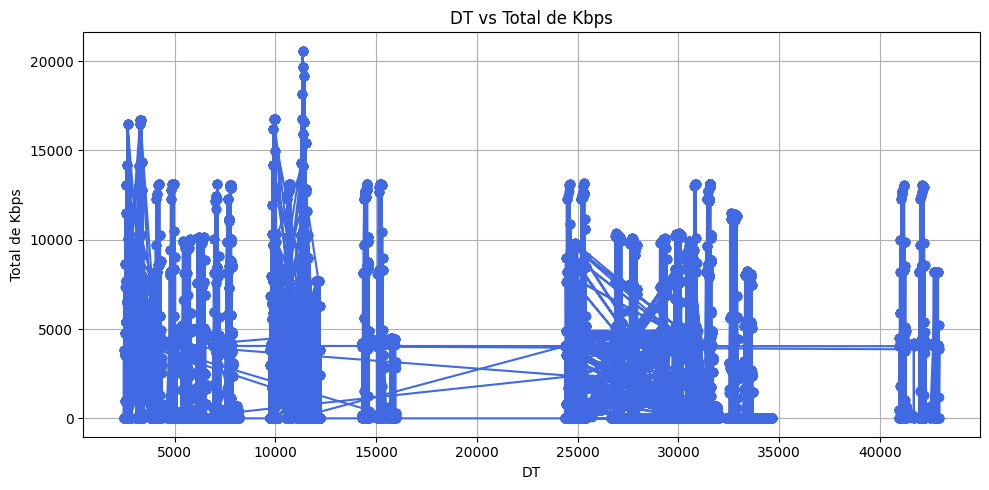

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(dataset["dt"], dataset["tot_kbps"], color='royalblue', marker='o')

plt.title('DT vs Total de Kbps')
plt.xlabel('DT')
plt.ylabel('Total de Kbps')
plt.grid(True)

plt.tight_layout()
plt.show()